In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# check for duplicates and drop them if found
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
print("\nData Types:")
print(customers.dtypes)
print(transactions.dtypes)


Data Types:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [11]:
merged_data = transactions.merge(products, on='ProductID', how='left')
merged_data = merged_data.merge(customers, on='CustomerID', how='left')

print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         E

In [12]:
print("\nSummary Statistics:")
print(merged_data.describe())

unique_customers = merged_data['CustomerID'].nunique()
unique_products = merged_data['ProductID'].nunique()
unique_regions = merged_data['Region'].nunique()

print(f"\nUnique Customers: {unique_customers}")
print(f"Unique Products: {unique_products}")
print(f"Unique Regions: {unique_regions}")


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y                     SignupDate  
count  1000.00000                           1000  
mean    272.55407  2023-07-09 02:49:55.199999744  
min      16.08000            2022-01-22 00:00:00  
25%     147.95000            2022-09-17 12:00:00  
50%     299.93000    

In [13]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [14]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


/tmp/ipykernel_3598/3607515724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


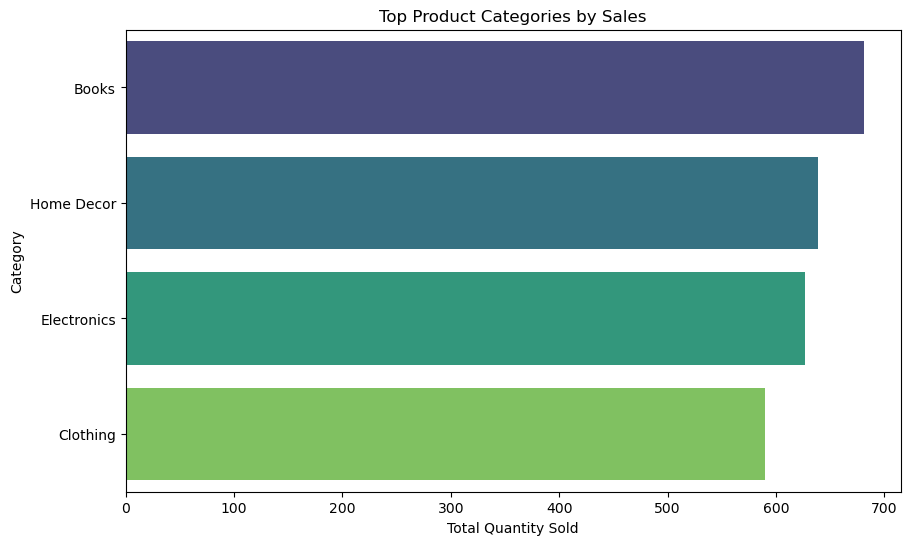

In [19]:
plt.figure(figsize=(10, 6))
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Top Product Categories by Sales')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.show()

/tmp/ipykernel_3598/2938232125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='coolwarm')


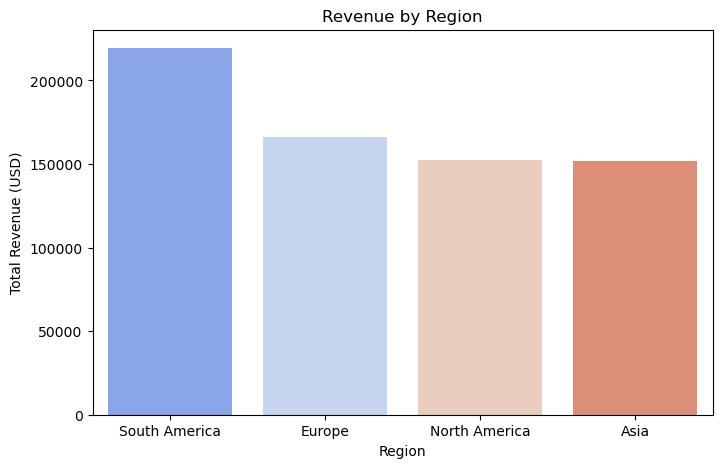

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='coolwarm')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

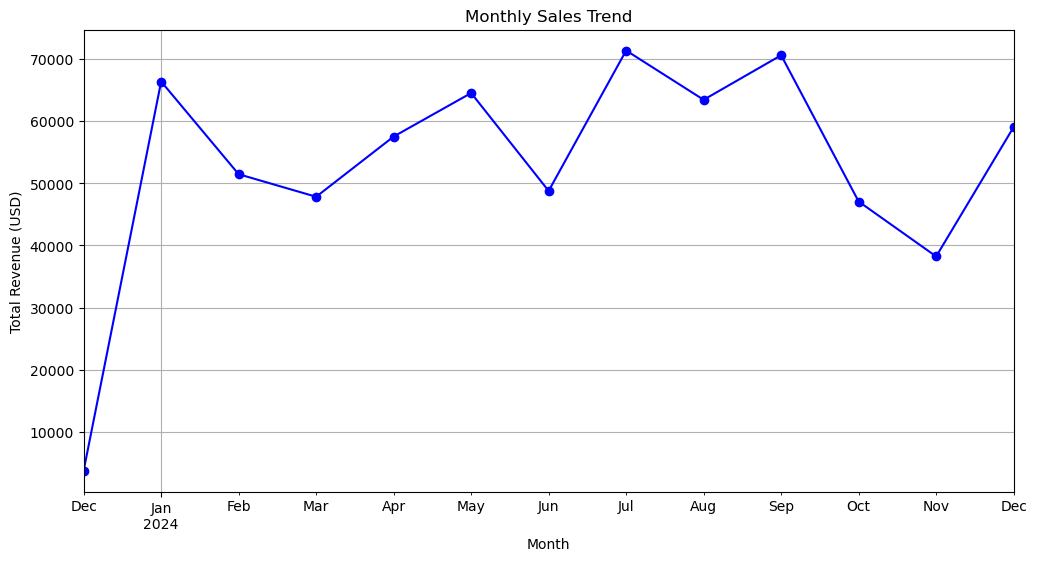

In [21]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()


/tmp/ipykernel_3598/2397522425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index, palette='Set2')


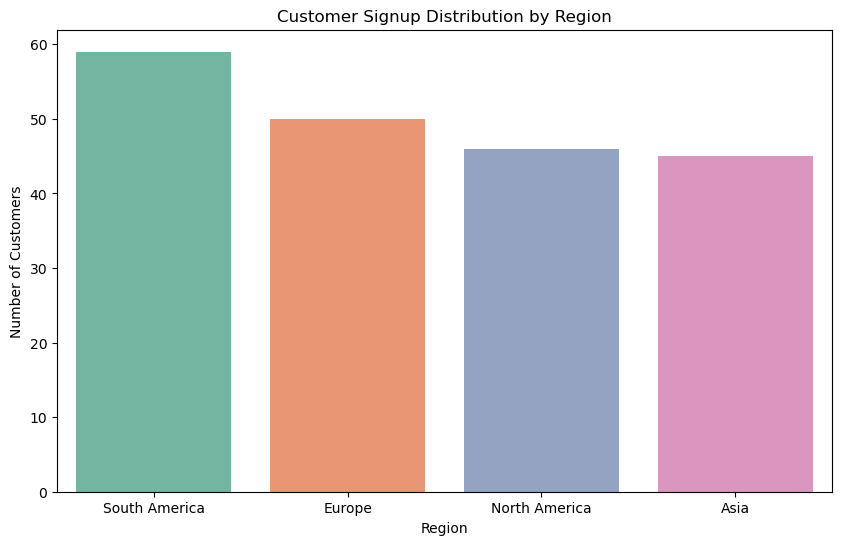

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index, palette='Set2')
plt.title('Customer Signup Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()